In [1]:
import pandas as pd
import datetime as dt

months = [
    ('enero', 1), 
    ('febrero', 2), 
    ('marzo', 3), 
    ('abril', 4), 
    ('mayo', 5), 
    ('junio', 6), 
    ('julio', 7), 
    ('agosto', 8)]

ds = pd.DataFrame()

for name, no in months:
    new_month_ds = pd.read_excel('delitos_{}_2020.xlsx'.format(name), skiprows=2)
    new_month_ds['DATE'] = dt.datetime.strptime('01/0%d/2020 00:00' % (no,) , '%d/%m/%Y %H:%M')
    ds = ds.append(new_month_ds)
        
ds.head()

DISTRITOS  RELACIONADAS CON LAS PERSONAS  RELACIONADAS CON EL PATRIMONIO  \
0      CENTRO                             58                             120   
1  ARGANZUELA                              7                              14   
2      RETIRO                              3                               3   
3   SALAMANCA                             11                              49   
4   CHAMARTÍN                              6                              11   

   POR TENENCIA DE ARMAS  POR TENENCIA DE DROGAS  POR CONSUMO DE DROGAS  \
0                     36                     166                     80   
1                      3                      10                      5   
2                      2                       6                      0   
3                      1                      43                      8   
4                      0                       8                      3   

        DATE  
0 2020-01-01  
1 2020-01-01  
2 2020-01-01  
3 2020-01-01  
4 2020-01-01

In [2]:
august = ds.copy()
august = august.loc[august['DATE'].dt.month == 8]
august['TOTAL'] = august.sum(axis=1)

total_rows = august['DISTRITOS'] == 'TOTAL'
row_to_drop = august[total_rows].index
august = august.drop(index=row_to_drop)

august.head()

DISTRITOS  RELACIONADAS CON LAS PERSONAS  RELACIONADAS CON EL PATRIMONIO  \
0      CENTRO                             50                              76   
1  ARGANZUELA                              9                              17   
2      RETIRO                              5                               6   
3   SALAMANCA                              9                              31   
4   CHAMARTÍN                              3                               3   

   POR TENENCIA DE ARMAS  POR TENENCIA DE DROGAS  POR CONSUMO DE DROGAS  \
0                      7                      73                     12   
1                      1                      10                      2   
2                      1                       4                      1   
3                      2                      26                      0   
4                      1                      13                      1   

        DATE  TOTAL  
0 2020-08-01    218  
1 2020-08-01     39  
2 2020-08-01     17  
3 2020-08-01     68  
4 2020-08-01     21

# Know your audience

Ok, imagine your boss entering the room with the following chart and yelling  "Have you seen these numbers ? I'm really worried"

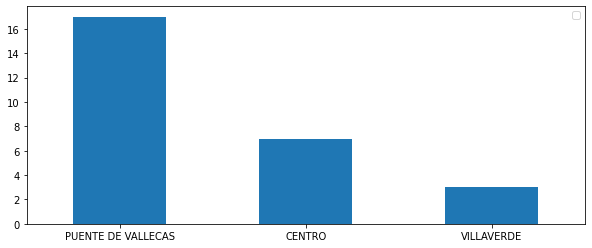

In [3]:
plot1_data = (august
    .copy()
    .sort_values('POR TENENCIA DE ARMAS', ascending=False)
    .loc[:, ['DISTRITOS', 'POR TENENCIA DE ARMAS']]
    .iloc[:3])

plot1 = plot1_data.plot.bar(x='DISTRITOS', figsize=(10, 4))

plot1.legend('')
plot1.set_xlabel('')
plot1.get_xaxis().set_tick_params(labelrotation=0)

You may think the man didn't get his pills on time this morning right ? What are those numbers, what do they mean ? Your boss is showing something to an audience that doesn't know the context, he didn't realize that the audience he's talking to needs more information, more context. If only he had added more information to the chart, maybe you could have had a chance. What about the same chart with more information.

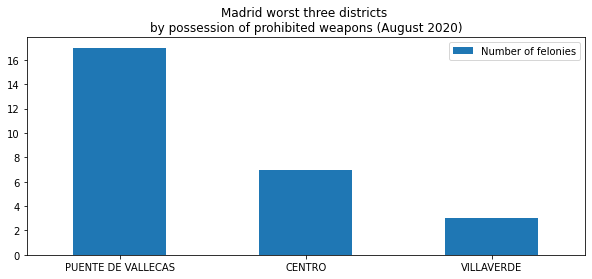

In [4]:
plot2 = plot1_data.plot.bar(x='DISTRITOS', figsize=(10, 4))

plot2.legend(['Number of felonies'])
plot2.set_xlabel('')
plot2.set_title('Madrid worst three districts \nby possession of prohibited weapons (August 2020)')
plot2.get_xaxis().set_tick_params(labelrotation=0)

Ok know I understand his concern, I know he lives in Puente de Vallecas, and he must be worried of the number of felonies due to possesion of prohibited weapons in his district. It's clear that if my boss were a police officer and I was working in the weapons related department I better know what the first chart was about!

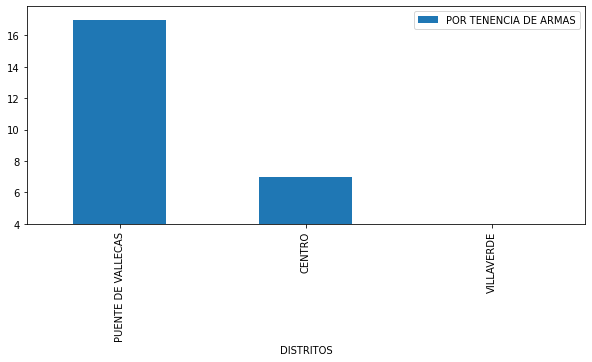

In [102]:
import matplotlib.pyplot as plt

fig, axp = plt.subplots()
data2a = plot1_data.copy()
filter_by = data2a.plot.bar(x='DISTRITOS', figsize=(10, 4), ax=axp)

plot2a.legend(['Number of felonies'])
plot2a.set_title('Madrid worst three districts \nby possession of prohibited weapons (August 2020)')
axp.set_ylim(ymin=4)
plot2a.get_xaxis().set_tick_params(labelrotation=0)

# Identify your message
Wrong example

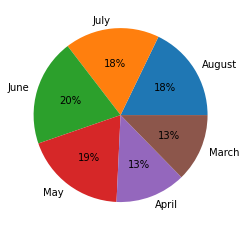

In [5]:
def increase_data(order):
    increase = ds.copy()

    increase['TOTAL'] = increase.sum(axis=1)
    increase = (increase[['DATE', 'TOTAL']]
        .groupby('DATE')
        .sum()
        .reset_index()
        .rename(columns={'DATE': 'MONTH'})
        .sort_values('MONTH', ascending=order))

    increase = increase.loc[increase['MONTH'].dt.month > 2]
    increase['MONTH'] = increase['MONTH'].dt.month_name()
    increase = increase.set_index('MONTH')
    return increase

increase_plot = (increase_data(False)
    .plot
    .pie(
        y='TOTAL', 
        x='MONTH', 
        autopct='%1.0f%%', 
        legend=False, 
        ylabel=''))

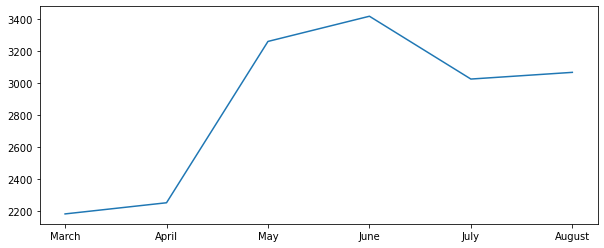

In [6]:
increase_plot = (increase_data(True)
    .plot
    .line(
        y='TOTAL', 
        figsize=(10, 4), 
        legend=False,
        xlabel=''))

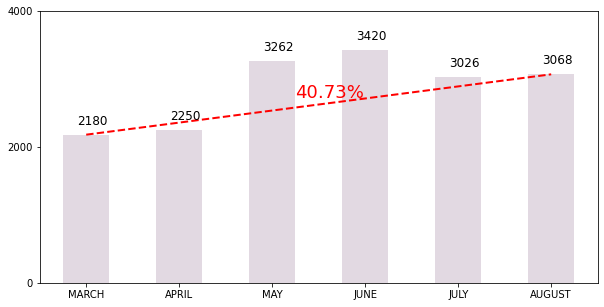

In [86]:
import matplotlib.pyplot as plt
import numpy as np

data = increase_data(True)
fig, ax2 = plt.subplots()

#yticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
yticks = [0, 2000, 4000]

base = (data
    .plot
    .bar(
        y='TOTAL',
        ax=ax2,
        figsize=(10, 5), 
        legend=False,
        width=0.5,
        colormap='twilight',
        yticks=yticks,
        xlabel=''))

base.set_xticklabels([month.get_text().upper() for month in base.get_xticklabels()])
base.set_xlabel('')

ttl = base.title
ttl.set_position([.5, 1.10])


incremental_data = (pd
    .DataFrame(list(zip([0, 1, 2, 3, 4, 5], np.linspace(data.iloc[0, 0], data.iloc[-1, 0], num=6))))
    .rename(columns={0: 'MONTH', 1: 'TOTAL'})
    .plot
    .line(
        x='MONTH', 
        y='TOTAL', 
        ax=ax2, 
        color='red', 
        linestyle='dashed', 
        linewidth=2,
        yticks=yticks,
        legend=False))

incremental_data.set_xlabel('')

totals           = data['TOTAL']
maximum, minimum = totals.iloc[[-1, 0]]
delta            = (maximum - minimum) / minimum

base.text(
        s="{:.2f}%".format(delta * 100), 
        x=2.25, 
        y=2800, 
        color="red", 
        verticalalignment="center",
        size=18)

for i, (p, pr) in enumerate(zip(data.index, data['TOTAL'])):
    base.text(
        s=pr,
        x=i - 0.1,
        y=pr + 150,
        size=12)

[datetime.date(2020, 1, 1), datetime.date(2020, 3, 1), datetime.date(2020, 5, 1), datetime.date(2020, 8, 1)]


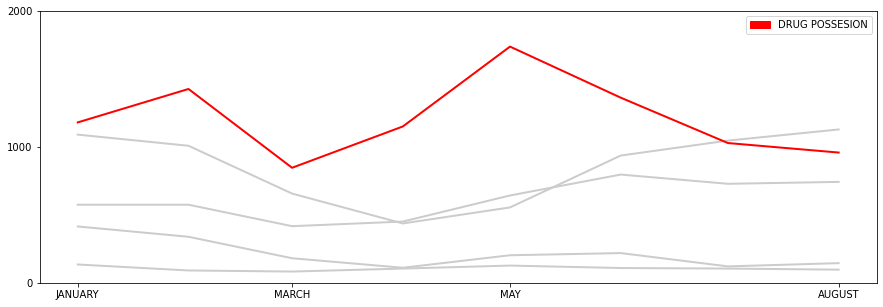

In [8]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

data = ds.copy()
fig, lx = plt.subplots()

data['DATE'] = data['DATE'].transform(lambda dt: dt.date())
mindt, maxdt = data['DATE'].agg(['min', 'max'])
xticks = [
    dt.datetime.strptime('1/2020', '%m/%Y').date(),
    dt.datetime.strptime('3/2020', '%m/%Y').date(),
    dt.datetime.strptime('5/2020', '%m/%Y').date(),
    dt.datetime.strptime('8/2020', '%m/%Y').date()
]

print(xticks)
(data
    .groupby('DATE')
    .agg('sum')
    .plot
    .line(
        ax=lx, 
        xlabel='',
        figsize=(15, 5),
        yticks=[0, 1000, 2000],
        xticks=xticks,
        linewidth=2, 
        color=['#cccccc', '#cccccc', '#cccccc', 'red', '#cccccc']))

#lx.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
lx.xaxis.set_major_formatter(mdates.DateFormatter('%^B'))

red_patch = mpatches.Patch(color='red', label='DRUG POSSESION')
plt.legend(handles=[red_patch])

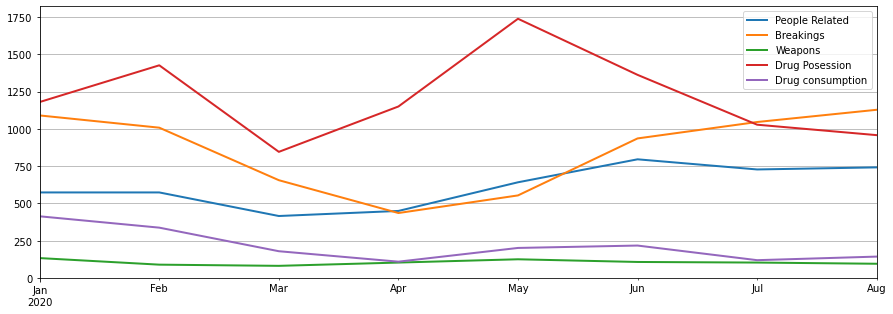

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

data = ds.copy()
fig, lx = plt.subplots()

(data
    .groupby('DATE')
    .agg('sum')
    .plot
    .line(
        ax=lx, 
        xlabel='',
        grid=True,
        figsize=(15, 5),
        linewidth=2))

lx.legend(['People Related', 'Breakings', 'Weapons', 'Drug Posession', 'Drug consumption'])

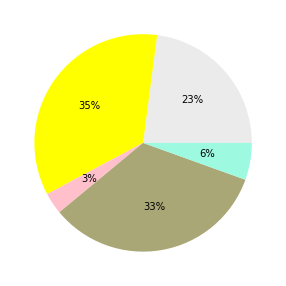

In [10]:
cs = ds.copy()
cs = (cs
    .loc[(cs['DATE'].dt.month == 8) & (cs['DISTRITOS'] == 'CENTRO')].drop(['DATE', 'DISTRITOS'], axis=1)
    .T
    .rename(columns={0: 'TOTAL'}))

cs.plot.pie(
    y='TOTAL',
    ylabel='',
    legend=False,
    figsize=(15,5),
    autopct='%1.0f%%',
    labels=['', '', '', '', ''],
    colors=['#ebebeb', 'yellow', 'pink', '#aaa777', '#9df9e0'],
)

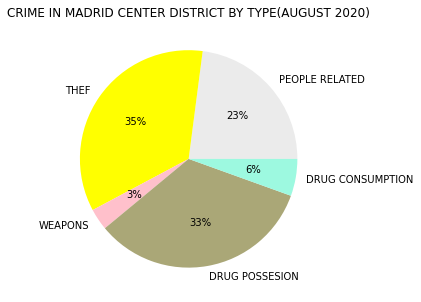

In [11]:
cs2 = ds.copy()
cs2 = (cs2
    .loc[(cs2['DATE'].dt.month == 8) & (cs2['DISTRITOS'] == 'CENTRO')].drop(['DATE', 'DISTRITOS'], axis=1)
    .T
    .rename(columns={0: 'TOTAL'}))

cs2.plot.pie(
    y='TOTAL',
    ylabel='',
    title='CRIME IN MADRID CENTER DISTRICT BY TYPE(AUGUST 2020)',
    legend=False,
    figsize=(15,5),
    autopct='%1.0f%%',
    labels=['PEOPLE RELATED', 'THEF', 'WEAPONS', 'DRUG POSSESION', 'DRUG CONSUMPTION'],
    colors=['#ebebeb', 'yellow', 'pink', '#aaa777', '#9df9e0'],
)

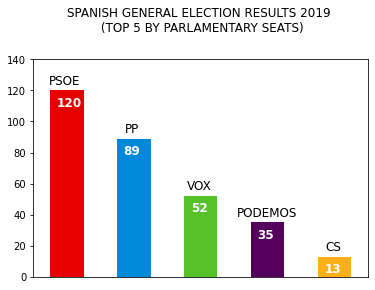

In [108]:
import numpy as np

def calculate_center(df, index):
    name = df.loc[index, 'PARTIES']
    divg = (len(name) * 0.2) / 3
    
    return divg

yticks = np.arange(0, 160, step=20)

el = pd.DataFrame({
    'PARTIES': ['PSOE', 'PP', 'VOX', 'PODEMOS', 'CS'],
    'SHARES': [120, 89, 52, 35, 13]
})

el_plot = el.plot.bar(
    title="SPANISH GENERAL ELECTION RESULTS 2019 \n (TOP 5 BY PARLAMENTARY SEATS)",
    legend=False,
    x='PARTIES',
    y='SHARES',
    yticks=yticks,
    xticks=[],
    xlabel='',
    color=['#e60000', '#0089d9', '#56c227', '#55005c', '#ffb018']
)

el_plot.title.set_position([.5, 1.10])

for i, (p, pr) in enumerate(zip(el.index, el['SHARES'])):
    divg = calculate_center(el, p)
    el_plot.text(
        s=pr,
        x=i - 0.15,
        y=pr - 10,
        color='w',
        weight="bold",
        size=12)
    el_plot.text(
        s=el.loc[p, 'PARTIES'],
        x=i - divg,
        y=pr + 4,
        size=12)
    

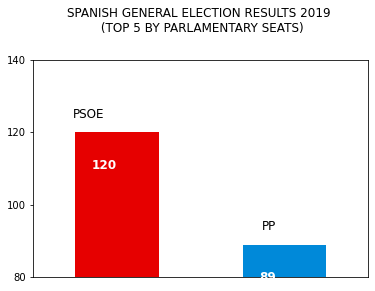

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_center(df, index):
    name = df.loc[index, 'PARTIES']
    divg = (len(name) * 0.2) / 3
    
    return divg

_, axp = plt.subplots()
yticks = np.arange(0, 160, step=20)

el = pd.DataFrame({
    'PARTIES': ['PSOE', 'PP'],
    'SHARES': [120, 89]
})

el_plot = el.plot.bar(
    title="SPANISH GENERAL ELECTION RESULTS 2019 \n (TOP 5 BY PARLAMENTARY SEATS)",
    legend=False,
    x='PARTIES',
    y='SHARES',
    yticks=yticks,
    xticks=[],
    xlabel='',
    ax=axp,
    color=['#e60000', '#0089d9', '#56c227', '#55005c', '#ffb018']
)

axp.set_ylim(ymin=80)
el_plot.title.set_position([.5, 1.10])

for i, (p, pr) in enumerate(zip(el.index, el['SHARES'])):
    divg = calculate_center(el, p)
    el_plot.text(
        s=pr,
        x=i - 0.15,
        y=pr - 10,
        color='w',
        weight="bold",
        size=12)
    el_plot.text(
        s=el.loc[p, 'PARTIES'],
        x=i - divg,
        y=pr + 4,
        size=12)
    

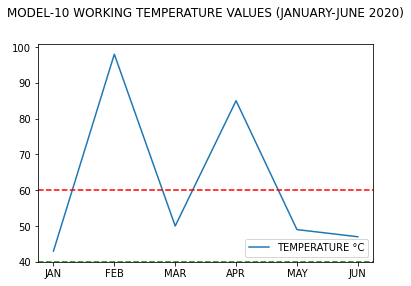

In [103]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

months = [dt.datetime.strptime("{:02}/2020".format(month), '%m/%Y').strftime("%b").upper() for month in range(1, 7)]
points = np.random.randint(100, size=6)

random = pd.DataFrame({'MONTHS': months, 'POINTS': points})
fig, ax = plt.subplots()

random.plot.line(
    title='MODEL-10 WORKING TEMPERATURE VALUES (JANUARY-JUNE 2020)',
    x='MONTHS', 
    y='POINTS', 
    ax=ax,
    xlabel=''
)

ax.title.set_position([.5, 1.10])

plt.legend(['TEMPERATURE °C'], loc='lower right')
plt.axhline(y=60, color='red', linestyle='dashed')
plt.axhline(y=40, color='green', linestyle='dashed')



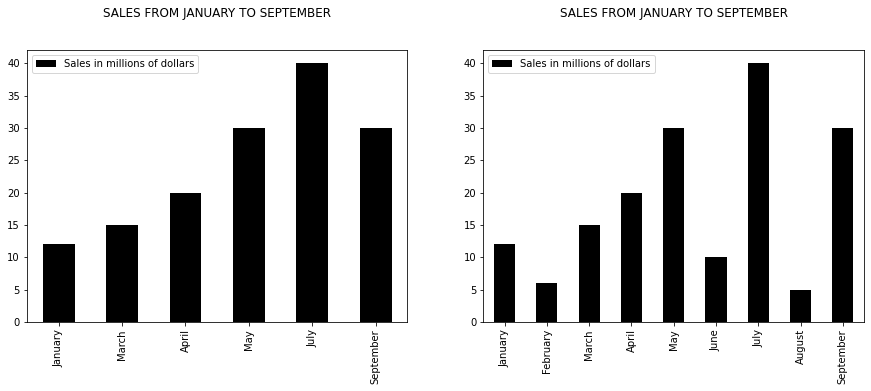

In [14]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

months = [dt.datetime.strptime("{:02}/2020".format(month), '%m/%Y') for month in range(1, 13)]
sales = [12, 6, 15, 20, 30, 10, 40, 5, 30, 3, 5, 12]


src = pd.DataFrame({'MONTHS': months, 'SALES': sales})
src['MONTH_NAME'] = src['MONTHS'].dt.month_name()

qry = (src['MONTHS'].dt.month < 12) & (src['SALES'] > 10)
raw = src[src['MONTHS'].dt.month < 10]
ski = src.loc[qry].copy()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

ski = ski.drop('MONTHS', axis=1)
               
ski.plot.bar(
    title='SALES FROM JANUARY TO SEPTEMBER',
    x='MONTH_NAME',
    y='SALES', 
    ax=ax1,
    colormap='gray',
    xlabel='')

raw.plot.bar(
    title='SALES FROM JANUARY TO SEPTEMBER',
    x='MONTH_NAME',
    y='SALES',
    colormap='gray',
    ax=ax2,
    xlabel=''
)

for chart in [ax1, ax2]:
    chart.legend(['Sales in millions of dollars'])
    chart.title.set_position([.5, 1.10])

In [15]:
ds.head()

DISTRITOS  RELACIONADAS CON LAS PERSONAS  RELACIONADAS CON EL PATRIMONIO  \
0      CENTRO                             58                             120   
1  ARGANZUELA                              7                              14   
2      RETIRO                              3                               3   
3   SALAMANCA                             11                              49   
4   CHAMARTÍN                              6                              11   

   POR TENENCIA DE ARMAS  POR TENENCIA DE DROGAS  POR CONSUMO DE DROGAS  \
0                     36                     166                     80   
1                      3                      10                      5   
2                      2                       6                      0   
3                      1                      43                      8   
4                      0                       8                      3   

        DATE  
0 2020-01-01  
1 2020-01-01  
2 2020-01-01  
3 2020-01-01  
4 2020-01-01

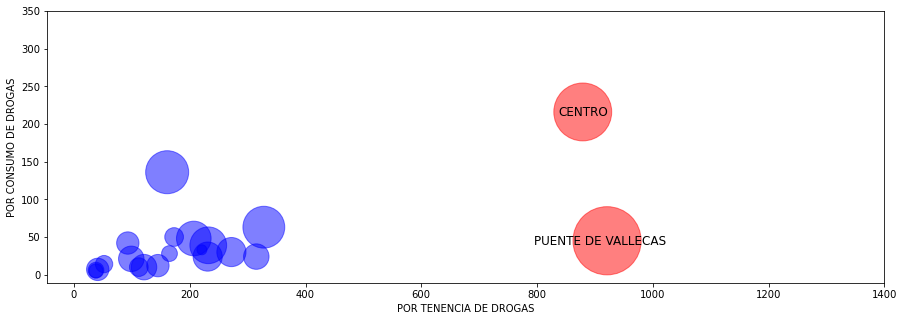

In [70]:
import matplotlib.pyplot as plt

THRESHOLD = 2000

data = ds.groupby('DISTRITOS').agg('sum').reset_index()
data = data[data['DISTRITOS'] != 'TOTAL']
data['VOLUMEN'] = data['POR TENENCIA DE ARMAS'] * 50
data['COLOR'] = 'blue'
data.loc[data['VOLUMEN'] >= THRESHOLD, 'COLOR'] = 'red'

fig, ax = plt.subplots()
scatter = data.plot.scatter(
    'POR TENENCIA DE DROGAS', 
    'POR CONSUMO DE DROGAS', 
    ax=ax,
    s=data['VOLUMEN'],
    alpha=0.5,
    yticks=np.arange(0, 400, step=50),
    xticks=np.arange(0, 1600, step=200),
    c='COLOR',
    figsize=(15,5))

dangerous = data.loc[data['VOLUMEN'] > THRESHOLD]
    
for next in range(0, len(dangerous)):
    dist, weap, poss, cons = dangerous.iloc[next, [0, 3, 4, 5]]
    xpos = poss - (7 * len(dist))
    ypos = cons - 5
    ax.text(s=dist,x=xpos, y=ypos, size=12)
    